<a href="https://colab.research.google.com/github/abdurrahmanbulut/song-popularity-prediction-ML/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LinearRegression

In [3]:
track = pd.read_csv('./drive/MyDrive/colab/data/tracks.csv')

In [4]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


# **Feature** inceleme

popülerlik inceleme

In [405]:
track.popularity.value_counts()

0      44690
35     12231
23     12139
1      12024
36     11879
       ...  
93         2
95         1
100        1
99         1
98         1
Name: popularity, Length: 101, dtype: int64

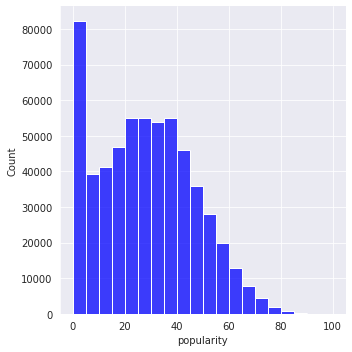

In [406]:
sns.displot(track.popularity, color="b", bins=20)

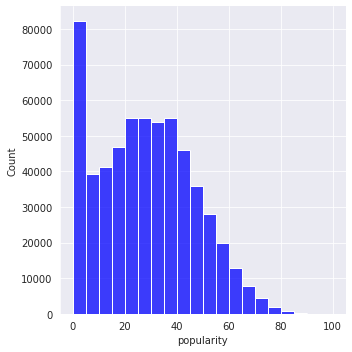

In [407]:
sns.displot(track.popularity, color="b", bins=20)

Duration_ms inceleme

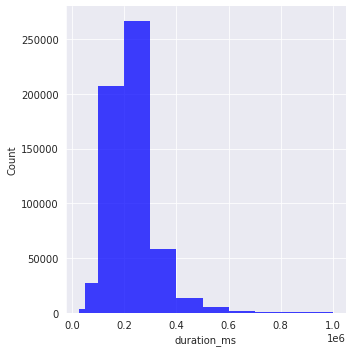

In [408]:
sns.displot(track.duration_ms, color="b", bins=[25000, 50000, 100000,200000,300000,400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1000000])

explicit inceleme

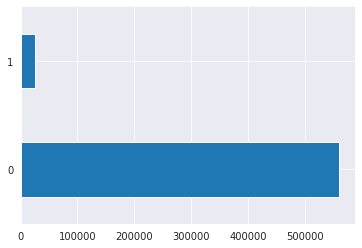

In [409]:
track.explicit.value_counts().plot.barh()

danceability inceleme

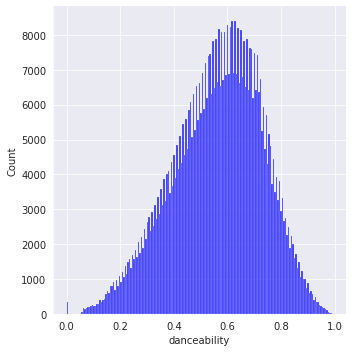

In [410]:
sns.displot(track.danceability, color="b")

energy, key, loudness inceleme

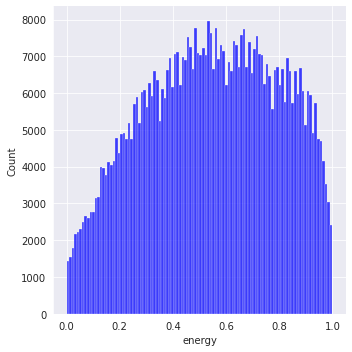

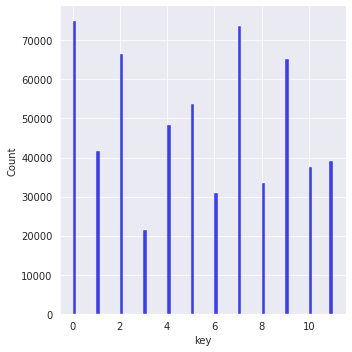

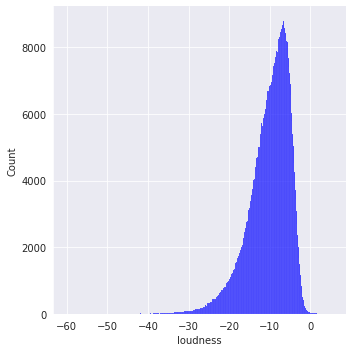

In [411]:
sns.displot(track.energy, color="b")
sns.displot(track.key, color="b")  # Bir şarkının anahtarı nedir? Bir şarkının anahtarı, müziğin ortalandığı nota veya akor, yani toniktir. the guitar chord key chart a bakılabilir.
sns.displot(track.loudness, color="b") # -60, 0 arası

 mode             
 speechiness           
 acousticness 

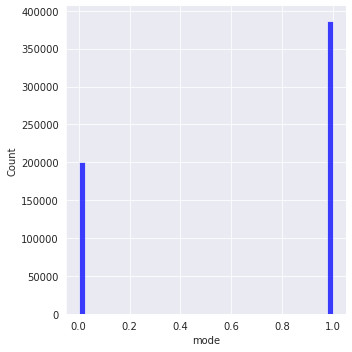

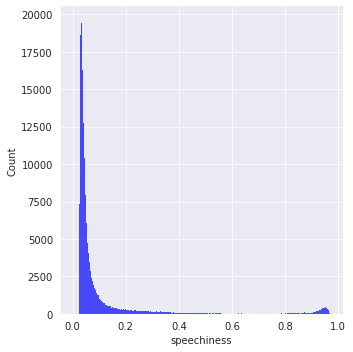

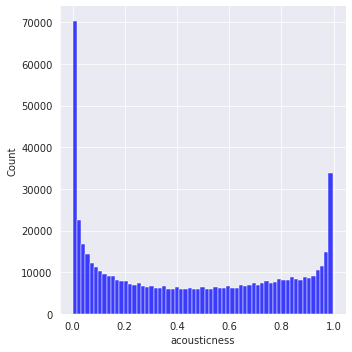

In [412]:
sns.displot(track["mode"], color="b")
sns.displot(track.speechiness, color="b")
sns.displot(track.acousticness, color="b")

instrumentalness           
liveness          
valence          
tempo            
time_signature             

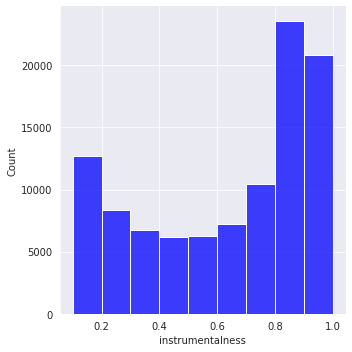

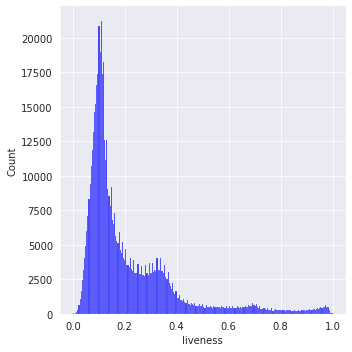

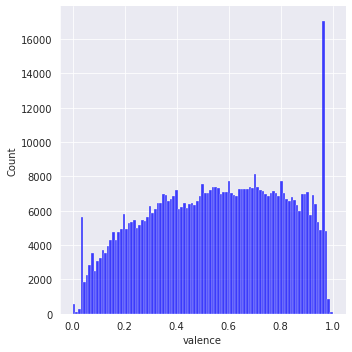

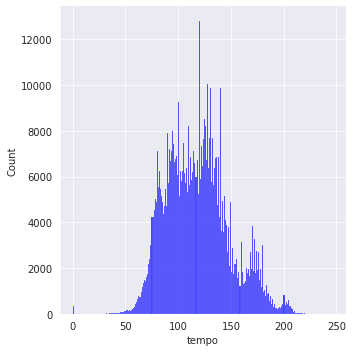

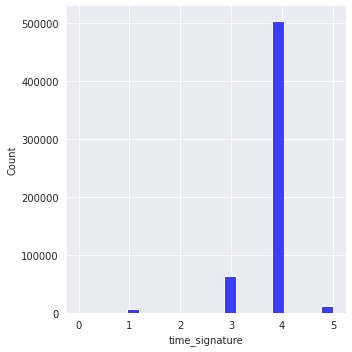

In [413]:
sns.displot(track.instrumentalness, color="b", bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
sns.displot(track.liveness, color="b")
sns.displot(track.valence, color="b")
sns.displot(track.tempo, color="b")
sns.displot(track.time_signature, color="b")

In [414]:
track.release_date.describe()

count         586672
unique         19700
top       1998-01-01
freq            2893
Name: release_date, dtype: object

# **Preprocessing**

Id, song name, artist's name, id of artists are dropped

In [6]:
track.drop(['name', 'id', 'artists', 'id_artists'], axis=1, inplace=True)

date format edited. ex: 01.01.2012 becomes 2012

In [7]:
track['release_date'] = np.where(track['release_date'].str.len() > 4, track['release_date'].str.slice(start=0, stop=4), track['release_date']).astype(str).astype(int)
before1922 = track[track['release_date'].astype(int) < 1922].index
track.drop(before1922, inplace=True)
track.reset_index(drop=True)

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,0,1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,0,1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,0,1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,50,258267,0,2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586667,72,153293,0,2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586668,70,187601,0,2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586669,58,142003,0,2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


Delete all songs with zero popularity and before 1940

In [8]:
zeroPopularity = track[track['popularity'] == 0]
zeroPopularity = zeroPopularity[zeroPopularity['release_date'] < 1940].index
zeroPopularity
track.drop(zeroPopularity, inplace=True)
track.reset_index(drop=True)
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571213 entries, 0 to 586671
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        571213 non-null  int64  
 1   duration_ms       571213 non-null  int64  
 2   explicit          571213 non-null  int64  
 3   release_date      571213 non-null  int64  
 4   danceability      571213 non-null  float64
 5   energy            571213 non-null  float64
 6   key               571213 non-null  int64  
 7   loudness          571213 non-null  float64
 8   mode              571213 non-null  int64  
 9   speechiness       571213 non-null  float64
 10  acousticness      571213 non-null  float64
 11  instrumentalness  571213 non-null  float64
 12  liveness          571213 non-null  float64
 13  valence           571213 non-null  float64
 14  tempo             571213 non-null  float64
 15  time_signature    571213 non-null  int64  
dtypes: float64(9), int64

In [9]:
track.release_date.describe()

count    571213.000000
mean       1990.111608
std          21.073509
min        1922.000000
25%        1976.000000
50%        1993.000000
75%        2008.000000
max        2021.000000
Name: release_date, dtype: float64

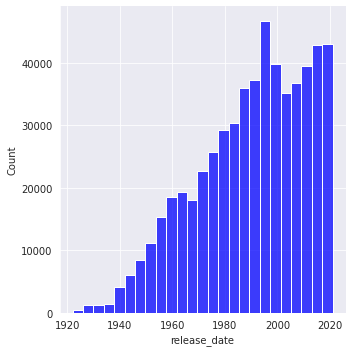

In [10]:
sns.displot(track.release_date, color="b", bins=25)

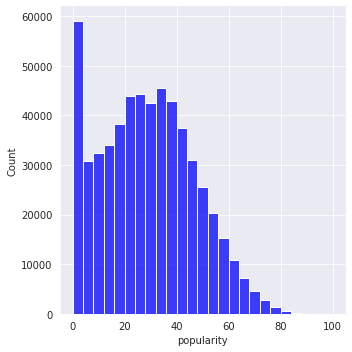

In [11]:
sns.displot(track.popularity, color="b", bins=25)

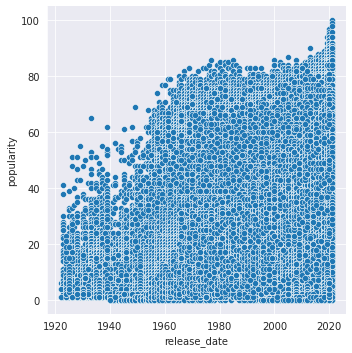

In [12]:
sns.relplot(data=track, x="release_date", y="popularity")

In [13]:
track.sort_values(by=['popularity'], ascending=False)

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,100,198082,1,2021,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.4200,0.4640,90.030,4
93803,99,242014,1,2021,0.585,0.436,10,-8.761,1,0.0601,0.721000,0.000013,0.1050,0.1320,143.874,4
93804,98,132780,0,2021,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.1500,0.4720,149.996,4
92810,97,215627,1,2020,0.680,0.826,0,-5.487,1,0.0309,0.021200,0.000012,0.5430,0.6440,118.051,4
92811,97,160191,0,2020,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.2030,0.5530,83.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350993,0,409251,0,2011,0.784,0.711,10,-9.452,0,0.0884,0.006910,0.691000,0.1100,0.3440,127.999,4
130751,0,431255,0,2018,0.728,0.871,4,-7.275,0,0.0359,0.000385,0.809000,0.0786,0.4740,111.993,4
130753,0,215027,0,2009,0.293,0.751,9,-9.695,1,0.0319,0.000094,0.000314,0.1100,0.7860,152.446,4
130755,0,481173,0,2015,0.652,0.672,10,-9.482,0,0.0509,0.186000,0.896000,0.0829,0.2110,122.010,4


In [14]:
(track.popularity==0).value_counts()

False    541981
True      29232
Name: popularity, dtype: int64

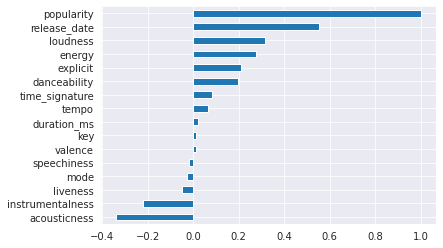

In [15]:
track.corr()["popularity"].sort_values().plot.barh()

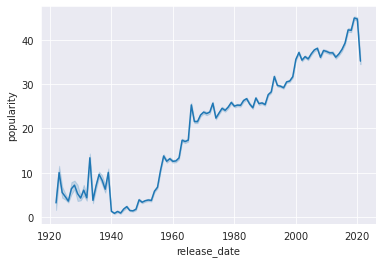

In [16]:
sns.lineplot(x="release_date", y="popularity", data=track)

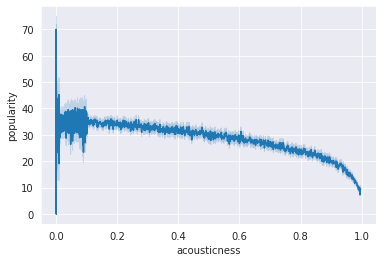

In [17]:
sns.lineplot(x="acousticness", y="popularity", data=track)

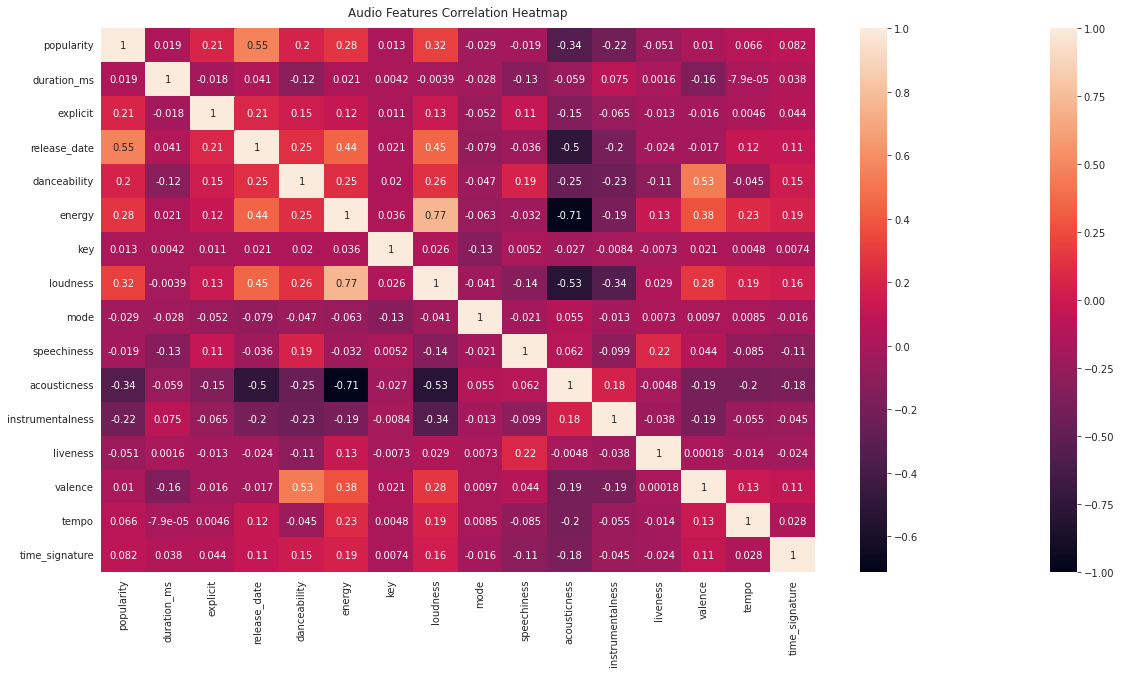

In [18]:
plt.figure(figsize=(20, 10))

heatmap = sns.heatmap(track.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Audio Features Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

sns.heatmap(track.corr());

In [19]:
track.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,571213.0,28.316161,18.041265,0.0,14.0000,28.000000,41.00000,100.000
duration_ms,571213.0,230874.746704,126118.233100,4937.0,175987.0000,216427.000000,264931.00000,5621218.000
explicit,571213.0,0.045221,0.207789,0.0,0.0000,0.000000,0.00000,1.000
release_date,571213.0,1990.111608,21.073509,1922.0,1976.0000,1993.000000,2008.00000,2021.000
danceability,571213.0,0.563580,0.166050,0.0,0.4530,0.577000,0.68500,0.991
energy,571213.0,0.548500,0.250553,0.0,0.3550,0.558000,0.75300,1.000
key,571213.0,5.227376,3.520790,0.0,2.0000,5.000000,8.00000,11.000
loudness,571213.0,-10.106321,5.022394,-60.0,-12.7530,-9.162000,-6.44300,5.376
mode,571213.0,0.656801,0.474778,0.0,0.0000,1.000000,1.00000,1.000
speechiness,571213.0,0.101325,0.172340,0.0,0.0338,0.043900,0.07500,0.971


# *Grouping songs by 20 years*

In [ ]:
track_1920_1940 = track[(track['release_date'].astype(int) < 1940) & (track['release_date'].astype(int) >= 1920)].reset_index(drop=True)
track_1940_1960 = track[(track['release_date'].astype(int) < 1960) & (track['release_date'].astype(int) >= 1940)].reset_index(drop=True)
track_1960_1980 = track[(track['release_date'].astype(int) < 1980) & (track['release_date'].astype(int) >= 1960)].reset_index(drop=True)
track_1980_2000 = track[(track['release_date'].astype(int) < 2000) & (track['release_date'].astype(int) >= 1980)].reset_index(drop=True)
track_2000_2021 = track[(track['release_date'].astype(int) <= 2021) & (track['release_date'].astype(int) >= 2000)].reset_index(drop=True)

track_2000_2021.release_date

0         2008
1         2020
2         2008
3         2008
4         2018
          ... 
203389    2020
203390    2020
203391    2020
203392    2021
203393    2015
Name: release_date, Length: 203394, dtype: int64

In [ ]:
track.release_date.describe()

count    203394.000000
mean       2010.945170
std           6.202101
min        2000.000000
25%        2006.000000
50%        2011.000000
75%        2016.000000
max        2021.000000
Name: release_date, dtype: float64

In [ ]:
track.release_date.value_counts()

2020    12990
1998    12475
1999    12455
1997    12334
1996    12024
        ...  
1923      103
1929       73
1924       70
1922        5
1900        1
Name: release_date, Length: 101, dtype: int64

# Outlier Detection

In [20]:
track.sort_values(by="release_date")

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,1922,0.645,0.445,0,-13.338,1,0.4510,0.67400,0.744000,0.151,0.127,104.851,3
13,1,186800,0,1922,0.703,0.280,0,-15.390,1,0.1740,0.99500,0.000068,0.163,0.897,127.531,4
26,4,180800,0,1922,0.420,0.288,7,-14.005,1,0.0701,0.99400,0.000216,0.196,0.400,139.575,3
132340,4,173893,0,1922,0.315,0.391,4,-7.220,0,0.0343,0.99600,0.587000,0.133,0.481,207.589,4
132316,1,186850,0,1922,0.756,0.652,5,-5.056,0,0.0575,0.53200,0.000000,0.666,0.941,91.478,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400401,2,218520,0,2021,0.730,0.939,11,-4.665,0,0.0532,0.03470,0.000000,0.335,0.939,121.001,4
400402,59,285114,0,2021,0.586,0.915,8,-5.079,1,0.1200,0.02300,0.000249,0.397,0.425,144.092,1
400403,59,147567,1,2021,0.678,0.797,1,-2.957,0,0.0458,0.35700,0.000000,0.101,0.642,147.996,4
400391,60,183704,1,2021,0.475,0.795,11,-5.044,0,0.2820,0.00691,0.000000,0.145,0.340,80.736,4


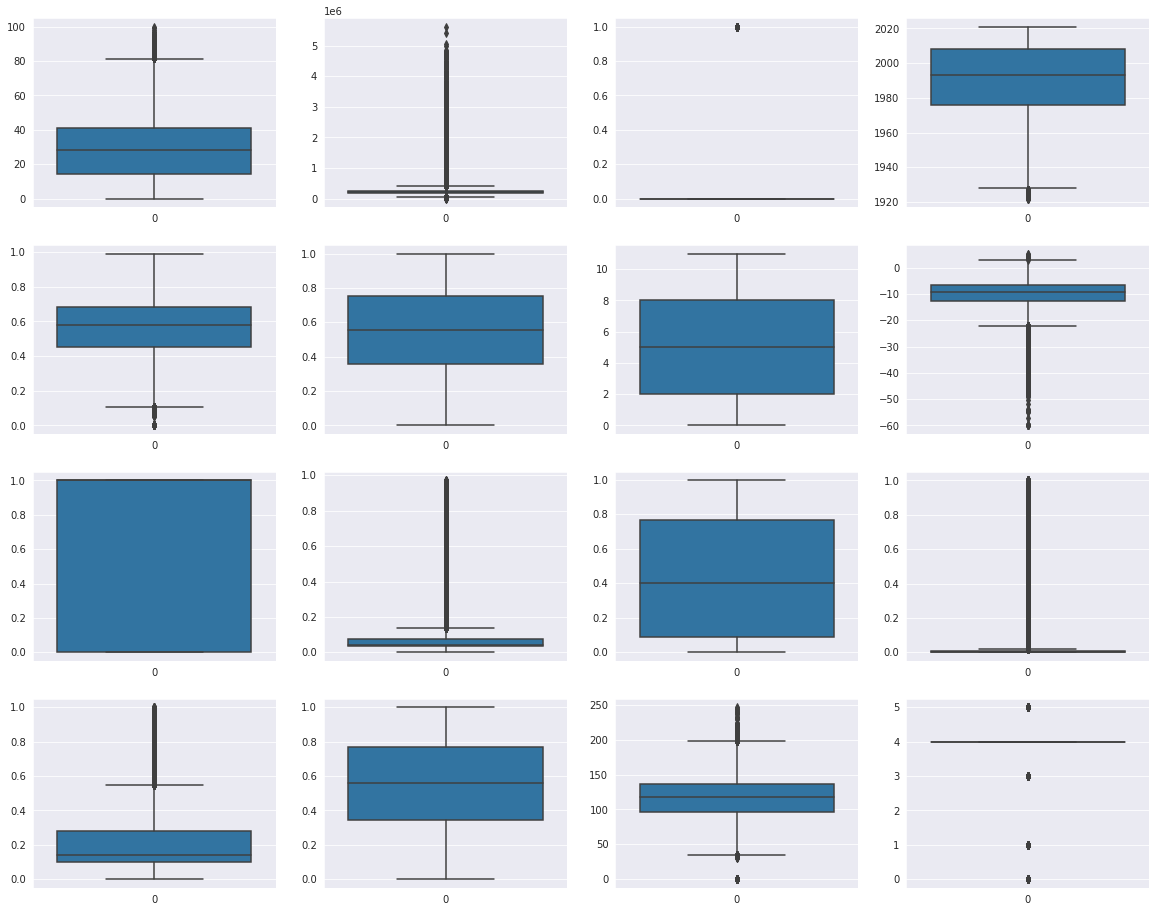

In [21]:
plt.figure(figsize=(20,16))
for i in range(len(track.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = track[track.columns[i]])
plt.show()

In [22]:
track.tempo.describe()

count    571213.000000
mean        118.629688
std          29.674720
min           0.000000
25%          95.835000
50%         117.697000
75%         136.571000
max         246.381000
Name: tempo, dtype: float64

In [23]:
zeroTempo = track[track['tempo'].astype(int) == 0].index
track.drop(zeroTempo, inplace=True)
track.reset_index(drop=True)

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,1,186800,0,1922,0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.1630,0.8970,127.531,4
2,4,180800,0,1922,0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.1960,0.4000,139.575,3
3,41,177133,0,1923,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.1830,0.2110,89.822,4
4,38,161933,0,1923,0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.2040,0.9010,104.606,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570900,50,258267,0,2020,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
570901,72,153293,0,2020,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
570902,70,187601,0,2020,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
570903,58,142003,0,2021,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [24]:
def get_outlier_counts(df, treshold):
    df = df.copy()
    #Get z-score for specified treshold. shitft and scale, ne kadar mean den uzaklar ı hesaplarız.
    treshold_z_score = stats.norm.ppf(treshold) #norm distribution. ppf: percent point funct. scipy içindfe bir istatik func. cdf nin tersi

    #get the z-scores for each value in track 
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    #compare df z-scores to the treshold, Return the count of outliers in each column
    return (z_score_df > treshold_z_score).sum(axis=0)

In [25]:
get_outlier_counts(track, 0.999999995)

popularity             0
duration_ms         1727
explicit               0
release_date           0
danceability           0
energy                 0
key                    0
loudness             205
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      6198
dtype: int64

In [26]:
def remove_outliers(df, treshold):

    df = df.copy()
    #Get z-score for specified treshold
    treshold_z_score = stats.norm.ppf(treshold)

    #get the z-scores for each value in track and compare them to the treshold
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    z_score_df.time_signature = treshold_z_score  # treshold is not needed for time signature

    z_score_df = z_score_df > treshold_z_score
    # Get indicies of outliers
    outliers = z_score_df.sum(axis=1) # her rowdaki outliers toplamı
    outliers = outliers > 0

    outliers_indicies = df.index[outliers]

    #Drop outliers
    df = df.drop(outliers_indicies, axis=0).reset_index(drop=True)

    return df

In [27]:
track = remove_outliers(track, 0.999999995)

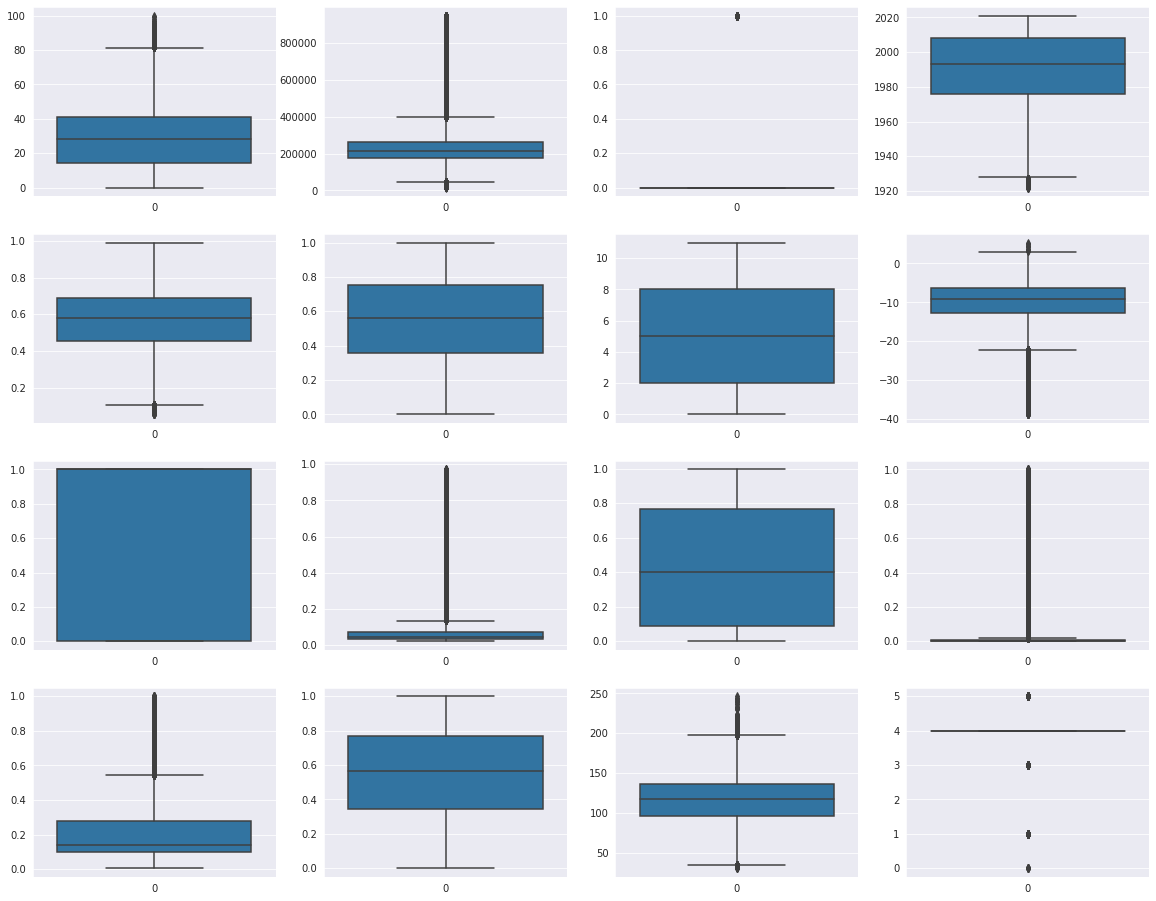

In [28]:
plt.figure(figsize=(20,16))
for i in range(len(track.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = track[track.columns[i]])
plt.show()

In [29]:
track.time_signature.describe()

count    568974.000000
mean          3.878617
std           0.457287
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

# **Normalization**

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
def preprocess_inputs(df, outliers=True, treshold=1):
    df = df.copy()
    if outliers == False:
        df = remove_outliers(df, treshold)

    df = df.drop('release_date', axis=1)
    y = df['popularity'].values
    x = df.drop('popularity', axis=1).values

    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=24)

    #scale data with standart scale
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    return x_train, x_test, y_train, y_test


In [37]:
outlier_x_train, outlier_x_test, outlier_y_train, outlier_y_test = preprocess_inputs(track, outliers=False, treshold=0.999999995)
x_train, x_test, y_train, y_test = preprocess_inputs(track, outliers=True)
# x_train_1, x_test_1, y_train_1, y_test_1 = preprocess_inputs(track_1920_1940, outliers=True)
# x_train_2, x_test_2, y_train_2, y_test_2 = preprocess_inputs(track_1940_1960, outliers=True)
# x_train_3, x_test_3, y_train_3, y_test_3 = preprocess_inputs(track_1960_1980, outliers=True)
# x_train_4, x_test_4, y_train_4, y_test_4 = preprocess_inputs(track_1980_2000, outliers=True)
# x_train_5, x_test_5, y_train_5, y_test_5 = preprocess_inputs(track_2000_2021, outliers=True)


# **Test outlier detection**

In [33]:
outlier_model = LinearRegression()
outlier_model.fit(outlier_x_train, outlier_y_train)

outlier_model_acc = outlier_model.score(outlier_x_test, outlier_y_test)

print("Test acc - outliers: {:.5f}".format(outlier_model_acc * 100))

Test acc - outliers: 20.39739


In [34]:
no_outlier_model = LinearRegression()
no_outlier_model.fit(x_train, y_train)

no_outlier_model_acc = no_outlier_model.score(x_test, y_test)

print("Test acc - outliers: {:.5f}".format(no_outlier_model_acc * 100))

Test acc - outliers: 20.65341


# **Model**

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers


In [84]:
def model():
  model = Sequential()

  model.add(Dense(8, activation="relu", input_dim=14))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(1, activation="relu"))

  model.compile(optimizer = "adam", loss = "mse" )  # mse : means squared error, gerçek veri ile tahmin değer farkının karesi

  return model

In [40]:
from sklearn import tree
y_train = y_train.astype(float)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_predict})



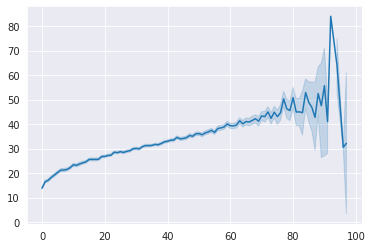

In [41]:
sns.lineplot(x=y_test, y=y_predict)

In [85]:
model1 = model()
# model2 = model()
# model3 = model()
# model4 = model()
# model5 = model() 

model1.fit(x_train, y_train, epochs=150, batch_size=1000)
# model2.fit(x_train_2, y_train_2, epochs=130, batch_size=1000)
# model3.fit(x_train_3, y_train_3, epochs=130, batch_size=1000)
# model4.fit(x_train_4, y_train_4, epochs=130, batch_size=1000)
# model5.fit(x_train_5, y_train_5, epochs=130, batch_size=1000)

Epoch 1/150
382/382 [==============================] - 1s 2ms/step - loss: 681.9078
Epoch 2/150
382/382 [==============================] - 1s 2ms/step - loss: 268.8985
Epoch 3/150
382/382 [==============================] - 1s 2ms/step - loss: 255.5340
Epoch 4/150
382/382 [==============================] - 1s 2ms/step - loss: 252.0144
Epoch 5/150
382/382 [==============================] - 1s 2ms/step - loss: 250.0057
Epoch 6/150
382/382 [==============================] - 1s 2ms/step - loss: 248.7439
Epoch 7/150
382/382 [==============================] - 1s 2ms/step - loss: 247.6860
Epoch 8/150
382/382 [==============================] - 1s 2ms/step - loss: 246.8811
Epoch 9/150
382/382 [==============================] - 1s 2ms/step - loss: 245.9144
Epoch 10/150
382/382 [==============================] - 1s 2ms/step - loss: 245.1747
Epoch 11/150
382/382 [==============================] - 1s 2ms/step - loss: 244.5600
Epoch 12/150
382/382 [==============================] - 1s 2ms/step - loss

In [60]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 120       
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')
model4.save('model4.h5')
model5.save('model5.h5')

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model1, "model1")
tfjs.converters.save_keras_model(model2, "model2")
tfjs.converters.save_keras_model(model3, "model3")
tfjs.converters.save_keras_model(model4, "model4")
tfjs.converters.save_keras_model(model5, "model5")




In [61]:
loss = model1.history.history["loss"]  

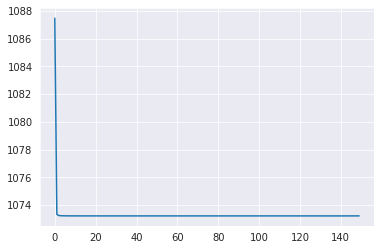

In [62]:
sns.lineplot(x=range(len(loss)), y=loss)

In [63]:
trainLoss = model1.evaluate(x_train, y_train, verbose=0)

In [64]:
testLoss = model1.evaluate(x_test, y_test, verbose=0)

In [65]:
trainLoss

1073.2181396484375

In [66]:
testLoss

1073.954345703125

In [67]:
testTahminleri = model1.predict(x_test)

5868/5868 [==============================] - 7s 1ms/step


In [68]:
testTahminleri    

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [69]:
ActualDf = pd.DataFrame(y_test, columns=["Actual Y"])

In [70]:
ActualDf

,Actual Y
0,39
1,8
2,14
3,3
4,29
...,...
187757,30
187758,61
187759,39
187760,44


In [71]:
testTahminleri = pd.Series(testTahminleri.reshape(113795))

ValueError: ignored

In [ ]:
testTahminleri

In [ ]:
tahminDf = pd.concat([ActualDf, testTahminleri], axis=1)

In [ ]:
tahminDf.columns = ["Actual Y", "Predicted Y"]

In [ ]:
tahminDf

In [72]:
sns.scatterplot(x = "Actual Y", y= "Predicted Y", data=tahminDf) 

NameError: ignored

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mean_absolute_error(tahminDf["Actual Y"], tahminDf["Predicted Y"])

12.056993296970681

In [60]:
mean_squared_error(tahminDf["Actual Y"], tahminDf["Predicted Y"])

225.57605340942325

In [ ]:
from tensorflow.keras.models import load_model
model.save("song_popularity.h5")

In [ ]:
#sonradan çağırma
myModel = load_model("song_popularity.h5")
myModel.predict(newSong)

In [62]:
#from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
# knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
# mlp_model = MLPClassifier()
# svm_model = SVC()

In [63]:
#log_model.fit(x_train, y_train)
#knn_model.fit(X_train, y_train)
dec_model.fit(x_train, y_train)
# mlp_model.fit(X_train, y_train)
# svm_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
#log_acc = log_model.score(x_test, y_test)
#knn_acc =knn_model.score(X_test, y_test)
dec_acc =dec_model.score(x_test, y_test)
# mlp_acc =mlp_model.score(X_test, y_test)
# svm_acc =svm_model.score(X_test, y_test)

In [67]:
print("Decision tree accuracy: ", dec_acc)

Decision tree accuracy:  0.042875346016960324


In [70]:
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(outlier_x_train, outlier_y_train)
# make predictions for test data
y_pred = model.predict(outlier_x_test)
accuracy = model.score(outlier_x_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[12:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 100.00%
